In [1]:
from minisom import MiniSom

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

import math
import numpy as np

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
features = iris.data
labels = iris.target
type(iris)
# print(f'{features[0]} ')


sklearn.utils._bunch.Bunch

In [3]:
sc = MinMaxScaler(feature_range = (0,1))
features = sc.fit_transform(features)

In [4]:
sigma = 1.5
lr = 0.5
n_features = features.shape[1]
n_samples = features.shape[0]
print(f"number of samples: {n_samples}")

map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))


print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {n_features}')

number of samples: 150
(map_height, map_width) = (8, 8)
Number of features: 4


In [5]:
som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr, 
              neighborhood_function='gaussian', random_seed=123)
 
som.pca_weights_init(features)
som.train(data=features, num_iteration=1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.06627848868800729


In [9]:
# print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T}')

Shape: (8, 8)
First Line: [[0.08193295 0.16554244 0.17720363 0.58759007 0.66732804 0.43138852
  0.35650207 0.18395191]
 [0.1241688  0.24068233 0.33872831 0.8267712  1.         0.64020839
  0.61749572 0.43270976]
 [0.14401587 0.25257025 0.46119121 0.94847952 0.85445233 0.6472423
  0.62726682 0.45824118]
 [0.13869458 0.36586708 0.67586461 0.84513965 0.63766415 0.53653036
  0.56050664 0.29114029]
 [0.19229767 0.57232941 0.8316259  0.57858776 0.39477501 0.46702484
  0.42207926 0.24435156]
 [0.4280545  0.80367082 0.71390969 0.40795085 0.38577698 0.43161066
  0.43474081 0.23502312]
 [0.51392491 0.74587698 0.52028815 0.34779221 0.40391471 0.44023381
  0.43985573 0.24329375]
 [0.22680713 0.36979696 0.23155943 0.26209988 0.24123531 0.30293189
  0.25274557 0.16393189]]


In [6]:
frequencies = som.activation_response(features)
print(f'Frequencies:\n {np.array(frequencies, np.uint)}')
print(frequencies)

Frequencies:
 [[3 1 3 2 3 3 1 0]
 [4 3 4 2 7 0 1 3]
 [1 3 2 1 0 2 4 1]
 [4 2 1 0 4 4 3 3]
 [0 0 0 2 2 3 1 0]
 [5 4 3 1 3 1 3 4]
 [1 2 0 3 1 3 3 2]
 [3 4 2 3 6 3 2 5]]
[[3. 1. 3. 2. 3. 3. 1. 0.]
 [4. 3. 4. 2. 7. 0. 1. 3.]
 [1. 3. 2. 1. 0. 2. 4. 1.]
 [4. 2. 1. 0. 4. 4. 3. 3.]
 [0. 0. 0. 2. 2. 3. 1. 0.]
 [5. 4. 3. 1. 3. 1. 3. 4.]
 [1. 2. 0. 3. 1. 3. 3. 2.]
 [3. 4. 2. 3. 6. 3. 2. 5.]]


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


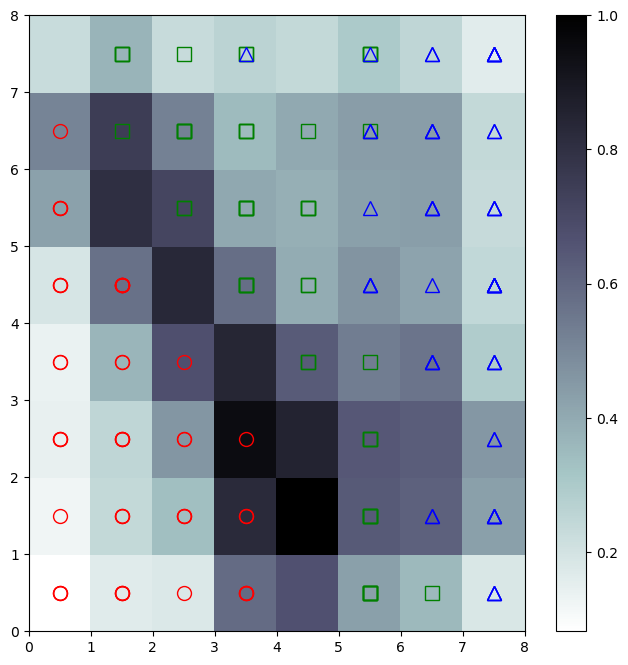

In [8]:
plt.figure(figsize=(map_height, map_width))

# plot U-matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

# plot markers
markers = ['o', 's', '^']   # 'setosa', 'versicolor' 'virginica'
colors = ['r', 'g', 'b']
w0=[] 
w1=[]
lbl=[]
mkrs=[]

for feature, label in zip(features, labels):
    w = som.winner(feature)
    w0=np.concatenate((w0, w[0]), axis=None)
    w1=np.concatenate((w1, w[1]), axis=None)
    lbl=np.concatenate((lbl, label), axis=None)
    mkrs=np.concatenate((mkrs,iris.target_names[label]), axis=None)

    plt.plot(w[0] + 0.5, w[1] + 0.5, 
        markers[label], markeredgecolor = colors[label], 
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)

plt.show()